In [1]:
import os
import random

import cv2
import h5py
import numpy as np
import pyiqa
import torch
import torchvision
from PIL import Image
from natsort import natsort
from torch.utils import data as data
from torchvision.transforms import functional as FF, ToTensor, Resize


class NtireDataset(data.Dataset):
    def __init__(self, opt):
        super(NtireDataset, self).__init__()
        self.opt = opt
        self.haze_image_path = [os.path.join(opt['haze_path'], x) for x in
                                natsort.natsorted(os.listdir(opt['haze_path']))]
        self.clear_image_path = [os.path.join(opt['clear_path'], x) for x in
                                 natsort.natsorted(os.listdir(opt['clear_path']))]

    def __getitem__(self, index):
        haze = Image.open(self.haze_image_path[index]).convert("RGB")
        clear = Image.open(self.clear_image_path[index]).convert("RGB")
        transform = torchvision.transforms.Compose([
            Resize(opt['size']),
            ToTensor()
        ])
        return {
            "gt": transform(clear),
            "lq": transform(haze),
            "gt_path": self.clear_image_path[index],
            "lq_path": self.haze_image_path[index],
        }

    def __len__(self):
        return len(self.haze_image_path)

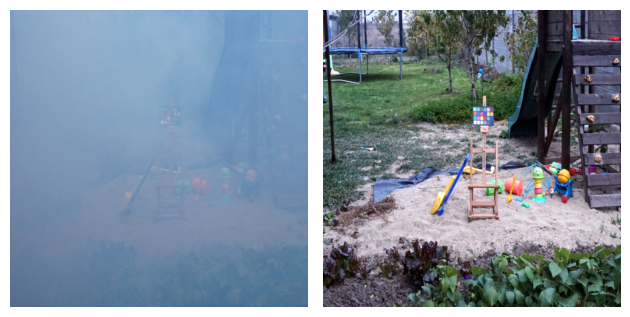

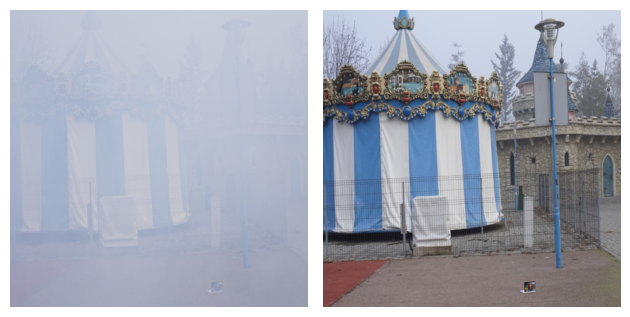

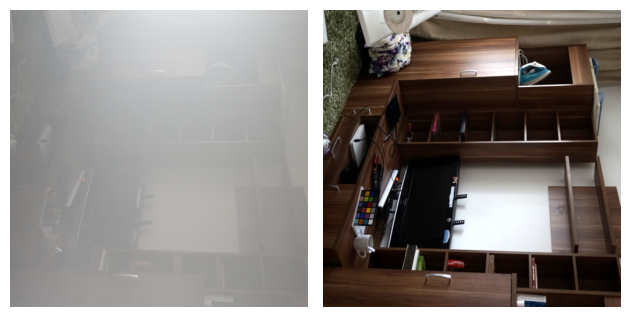

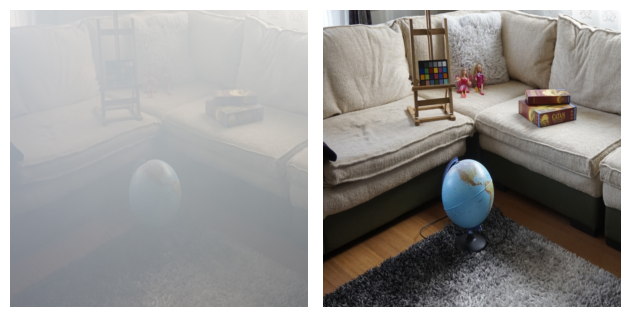

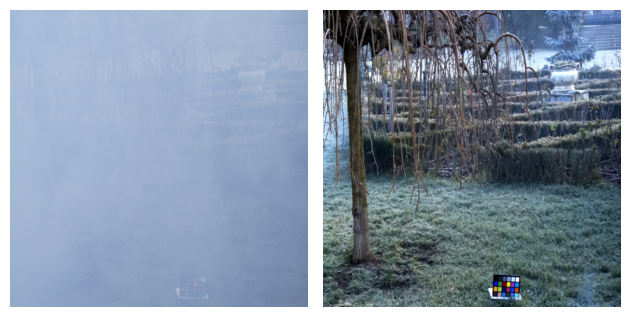

In [2]:
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

opt = {
    "haze_path": "D:/DeepLearning/dataset/DENSE-HAZE/hazy",
    "clear_path": "D:/DeepLearning/dataset/DENSE-HAZE/clean",
    "size": (512, 512)
}
dataset = NtireDataset(opt)
test_dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)
count = 0
for my_data in test_dataloader:
    if count == 5:
        break
    lq = my_data["lq"].squeeze().permute(1, 2, 0)
    gt = my_data["gt"].squeeze().permute(1, 2, 0)
    images = [lq, gt]
    fig, axs = plt.subplots(1, 2)
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0, top=0.7)
    plt.tight_layout()
    plt.show()
    count += 1